# XGBoost Regressor on Kaggle Dataset

In [303]:
#Importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [306]:
df = pd.read_csv('sales_data.csv')

In [271]:
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [307]:
df['Date'] = pd.to_datetime(df['Date']) # For better visualizing

In [308]:
df = df.sort_values(by='Date',ascending=True)

In [309]:
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
60993,2011-01-01,1,January,2011,42,Adults (35-64),M,United States,California,Bikes,Road Bikes,"Road-750 Black, 44",1,344,540,185,344,529
58729,2011-01-01,1,January,2011,33,Young Adults (25-34),F,France,Yveline,Bikes,Road Bikes,"Road-150 Red, 48",2,2171,3578,1097,4342,5439
58913,2011-01-01,1,January,2011,17,Youth (<25),M,Canada,British Columbia,Bikes,Road Bikes,"Road-250 Red, 44",1,1519,2443,900,1519,2419
63711,2011-01-01,1,January,2011,39,Adults (35-64),M,United States,Washington,Bikes,Road Bikes,"Road-550-W Yellow, 38",3,713,1120,482,2139,2621
49787,2011-01-01,1,January,2011,23,Youth (<25),M,Australia,Victoria,Bikes,Mountain Bikes,"Mountain-200 Black, 46",1,1252,2295,561,1252,1813


Checking the revenue plot

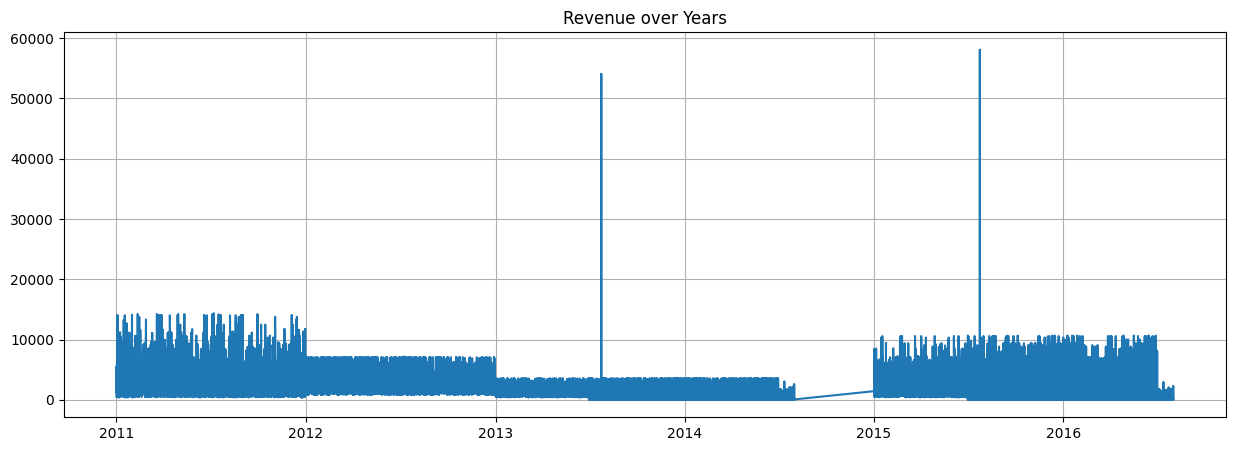

In [310]:
plt.figure(figsize=(15,5))
plt.plot(df['Date'],df['Revenue'])
plt.title('Revenue over Years')
plt.grid(True)

In [312]:
#Encoding months to numbers
months = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}
df['Month_number'] = df['Month'].map(months)
df = df.drop(columns=['Month'])

In [313]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder # Libraries I used to encoded categorical columns into numeric ones for the algorithm

Most of my categorical columns are 'nominal' which means they do not have a defined order and are random. For example, the gender column isn't a order column. Because of this, the OneHotEncoder works best as it creates a column for each value within the original column with 0.0 if its absent or 1.0 if its present.

I have one categorical column remaining (Age_Group) which is 'ordinal' meaning it is order (in increasing age order), which is why I used the LabelEncoder that assigns increasing numeric values for each category and creates a single column, rather than seperate columns.

In [314]:
le = LabelEncoder()
df['Age_Group_Enc'] = le.fit_transform(df['Age_Group']) # Ordinal

In [316]:
cat_columns = ['Customer_Gender','Country','State','Product_Category','Sub_Category'] # Nominal
ohe = OneHotEncoder(sparse_output=False,drop=None)
enc_arr = ohe.fit_transform(df[cat_columns])
enc_cols = ohe.get_feature_names_out(cat_columns)
enc_df = pd.DataFrame(enc_arr,columns=enc_cols,index=df.index)
enc_df.head()

,Customer_Gender_F,Customer_Gender_M,Country_Australia,Country_Canada,Country_France,Country_Germany,Country_United Kingdom,Country_United States,State_Alabama,State_Alberta,...,Sub_Category_Helmets,Sub_Category_Hydration Packs,Sub_Category_Jerseys,Sub_Category_Mountain Bikes,Sub_Category_Road Bikes,Sub_Category_Shorts,Sub_Category_Socks,Sub_Category_Tires and Tubes,Sub_Category_Touring Bikes,Sub_Category_Vests
60993,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
58729,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
58913,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
63711,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
49787,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [317]:
df_new = pd.concat([df.drop(columns=cat_columns),enc_df],axis=1) # New dataframe

In [318]:
# Deriving more time-based attributes
df_new['Day_Of_Week'] = df_new['Date'].dt.dayofweek 
df_new['is_weekend'] = df_new['Day_Of_Week'].isin([5,6]).astype(int)  
df_new['Quarter'] = df_new['Date'].dt.quarter
df_new = df_new.drop(columns=['Customer_Age','Age_Group','Product'])

In [290]:
df_new.head()

,Date,Day,Year,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Month_number,...,Sub_Category_Mountain Bikes,Sub_Category_Road Bikes,Sub_Category_Shorts,Sub_Category_Socks,Sub_Category_Tires and Tubes,Sub_Category_Touring Bikes,Sub_Category_Vests,Day_Of_Week,is_weekend,Quarter
60993,2011-01-01,1,2011,1,344,540,185,344,529,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5,1,1
58729,2011-01-01,1,2011,2,2171,3578,1097,4342,5439,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5,1,1
58913,2011-01-01,1,2011,1,1519,2443,900,1519,2419,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5,1,1
63711,2011-01-01,1,2011,3,713,1120,482,2139,2621,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5,1,1
49787,2011-01-01,1,2011,1,1252,2295,561,1252,1813,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5,1,1


In [319]:
# Machine Learning Libraries
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [320]:
X = df_new.drop(columns='Revenue') # Input Labels
y = df_new['Revenue'] # Target Label
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101,shuffle=False) # Splitting data

In [321]:
# Creating and fitting an XGBRegressor with tweaked hyperparameters to adjust to the data
model = xgb.XGBRegressor(objective='reg:squarederror',n_estimators=100,learning_rate=0.1,max_depth=5)
model.fit(X_train.drop(columns='Date'),y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [322]:
preds = model.predict(X_test.drop(columns='Date')) # Using the model to predict the test data
rmse = np.sqrt(mean_squared_error(y_test,preds)) # Using the Root Mean-Squared Error Metric to evaluate model performance
print(f"RMSE: {rmse:.2f}")

RMSE: 19.99


Visualizing actual data vs. Predicted Data

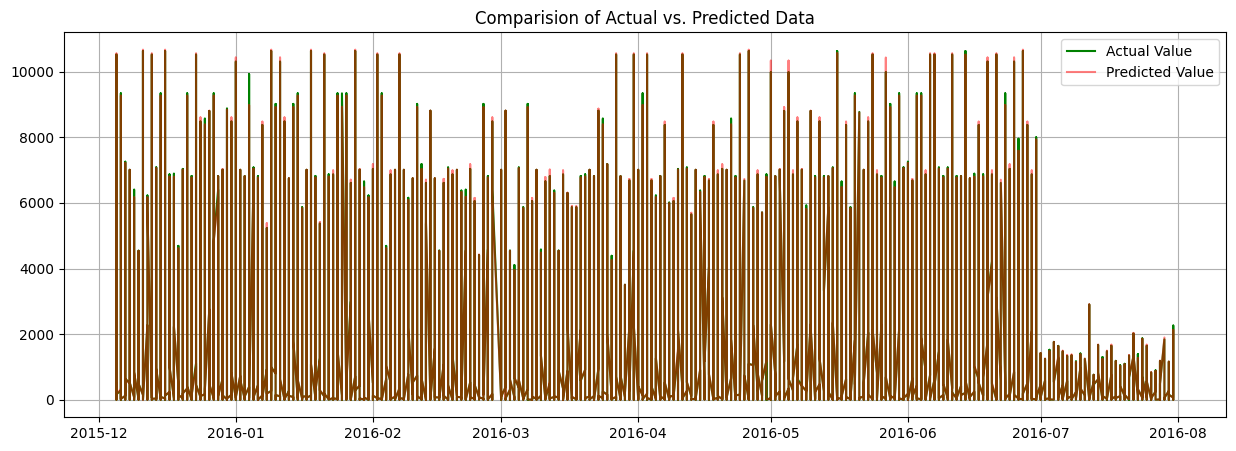

In [323]:
plt.figure(figsize=(15,5))
plt.plot(X_test['Date'],y_test,color='green',label='Actual Value')
plt.plot(X_test['Date'],preds,color='red',label='Predicted Value',alpha=0.5)
plt.legend()
plt.grid(True)
plt.title('Comparision of Actual vs. Predicted Data')
plt.show()

The two graphs look almost identical, which indicates a good model performance.